<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/tito/lookingood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

Dataset Paths

In [3]:
train_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/train/train"
test_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test"

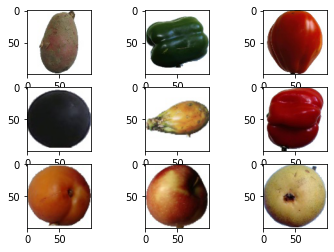

In [27]:
import os
from matplotlib import pyplot
from matplotlib.image import imread

img_dir="/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test"
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
k=1
for i in data_path:
  plt.subplot(3,3,k) 
  k=k+1
  plt.imshow(imread(i))
  if k == 10:
    break

plt.show()


Creating training and test data

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
!pip install split-folders
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/CNN IMAGES/archive (1)/train/train", output="/content/drive/MyDrive/CNN IMAGES/archive (1)/val",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False) # default values

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 16854 files [05:50, 48.09 files/s] 


Importing data into generators

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (299,299),
    batch_size = 8,
    class_mode = 'categorical', 
    shuffle=True)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (299,299),
    batch_size = 8,
    shuffle=True,
    class_mode = 'categorical')

Found 13471 images belonging to 33 classes.
Found 3383 images belonging to 33 classes.


Xception Model

In [ ]:
model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(299, 299, 3))

for layer in model.layers[:-5]:
    layer.trainable = False

x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(.3)(x)
predictions = Dense(33, activation="softmax")(x)
model_final = Model(model.input, predictions)

model_final.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
#model_final.summary()

83683744/83683744 [==============================] - 1s 0us/step


Xception


In [ ]:
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model_final.fit_generator(generator=train_generator,                   
                                    steps_per_epoch=150,
                                    validation_data=test_generator,                    
                                    validation_steps=10,
                                    epochs=25,
                                    callbacks = [checkpoint],
                                    verbose=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/25

Epoch 1: val_loss improved from inf to 1.81729, saving model to vgg16_1.h5
150/150 - 56s - loss: 3.0566 - accuracy: 0.2625 - val_loss: 1.8173 - val_accuracy: 0.4500 - 56s/epoch - 376ms/step
Epoch 2/25

Epoch 2: val_loss improved from 1.81729 to 1.11587, saving model to vgg16_1.h5
150/150 - 39s - loss: 1.7564 - accuracy: 0.5100 - val_loss: 1.1159 - val_accuracy: 0.6500 - 39s/epoch - 260ms/step
Epoch 3/25

Epoch 3: val_loss improved from 1.11587 to 0.88812, saving model to vgg16_1.h5
150/150 - 40s - loss: 1.3223 - accuracy: 0.6155 - val_loss: 0.8881 - val_accuracy: 0.7875 - 40s/epoch - 266ms/step
Epoch 4/25

Epoch 4: val_loss improved from 0.88812 to 0.51309, saving model to vgg16_1.h5
150/150 - 39s - loss: 0.9952 - accuracy: 0.6967 - val_loss: 0.5131 - val_accuracy: 0.8250 - 39s/epoch - 260ms/step
Epoch 5/25

Epoch 5: val_loss did not improve from 0.51309
150/150 - 32s - loss: 0.9006 - accuracy: 0.7458 - val_loss: 0.6337 - val_accuracy: 0.7875 - 32s/epoch - 215ms/step
Epoch 

Plot Xception

In [ ]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Accuracy Graph

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Loss Graph

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline
import requests
from matplotlib.image import img 

#loading and preprocessing cat image
IMAGE_PATH='/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test/0013.jpg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)

#view the image
plt.imshow(img/255.)

In [ ]:
#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()
imgnet_map={v[1]:k for k, v in imgnet_map.items()}

#make model predictions
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
decode_predictions(predictions,top=5)